## Проект по модулям 1 и 2

### Импорт библиотек

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

### Загрузка и обзор данных

In [2]:
df = pd.read_csv('/content/drive/MyDrive/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
cols = list(map(lambda x: x.lower().strip(), df.columns))
df.columns = cols

In [4]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness of breath    309 non-null    int64 
 13  swallowing difficulty  309 non-null    int64 
 14  chest pain             309 non-null    int64 
 15  lung_cancer            

In [6]:
# размер датасета
df.shape

(309, 16)

In [7]:
# проверка на наличие пропусков
df.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol consuming        0
coughing                 0
shortness of breath      0
swallowing difficulty    0
chest pain               0
lung_cancer              0
dtype: int64

### Разведочный анализ данных (EDA)

Таблица со значениями признаков и с количеством значений

In [8]:
feature_df = pd.DataFrame(columns=['feature', 'values', 'value_quantity'])

In [9]:
feature_df['feature'] = df.columns

In [10]:
values = []
value_quantity = []
for column in df.columns:
  values.append(np.sort(df[column].unique()))
  value_quantity.append(df[column].nunique())

In [11]:
feature_df['values'] = values
feature_df['value_quantity'] = value_quantity

In [12]:
feature_df

,feature,values,value_quantity
0,gender,"[F, M]",2
1,age,"[21, 38, 39, 44, 46, 47, 48, 49, 51, 52, 53, 5...",39
2,smoking,"[1, 2]",2
3,yellow_fingers,"[1, 2]",2
4,anxiety,"[1, 2]",2
5,peer_pressure,"[1, 2]",2
6,chronic disease,"[1, 2]",2
7,fatigue,"[1, 2]",2
8,allergy,"[1, 2]",2
9,wheezing,"[1, 2]",2


Выделим в отдельное множество бинарные признаки и вычтем из этого множества целевую переменную

In [13]:
bin_features = list(set(feature_df[feature_df['value_quantity'] == 2]['feature']) - {'lung_cancer'} - {'gender'})
bin_features

['smoking',
 'anxiety',
 'coughing',
 'yellow_fingers',
 'wheezing',
 'swallowing difficulty',
 'chronic disease',
 'chest pain',
 'peer_pressure',
 'allergy',
 'shortness of breath',
 'fatigue',
 'alcohol consuming']

Составим таблицу с количеством значений для бинарных признаков

In [14]:
bin_df = pd.DataFrame(columns=['binary_feature', 'quantity_1', 'quantity_2'])

In [15]:
quantity_1 = []
quantity_2 = []
for column in bin_features:
  quantity_1.append(df[column].value_counts()[1])
  quantity_2.append(df[column].value_counts()[2])

In [16]:
bin_df['binary_feature'] = bin_features
bin_df['quantity_1'] = quantity_1
bin_df['quantity_2'] = quantity_2
bin_df

,binary_feature,quantity_1,quantity_2
0,smoking,135,174
1,anxiety,155,154
2,coughing,130,179
3,yellow_fingers,133,176
4,wheezing,137,172
5,swallowing difficulty,164,145
6,chronic disease,153,156
7,chest pain,137,172
8,peer_pressure,154,155
9,allergy,137,172


In [21]:
df['gender'].value_counts()

M    162
F    147
Name: gender, dtype: int64

In [22]:
df['lung_cancer'].value_counts()

YES    270
NO      39
Name: lung_cancer, dtype: int64

Построим распределение значений бинарных признаков

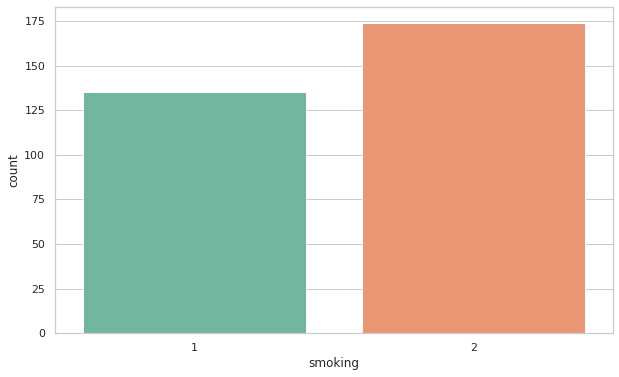

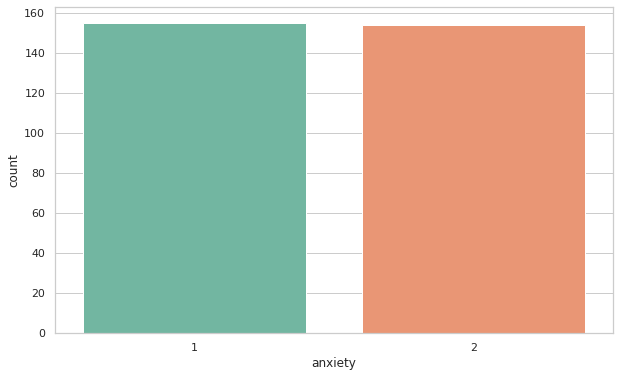

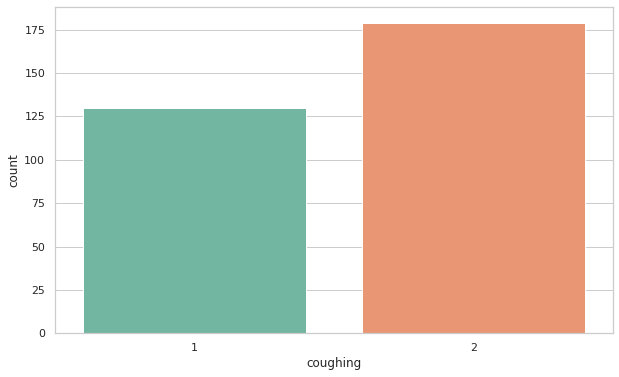

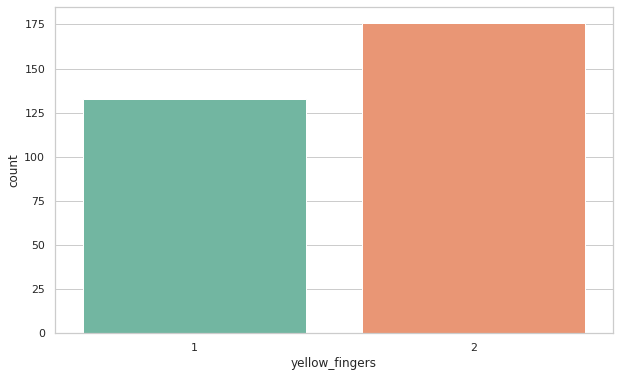

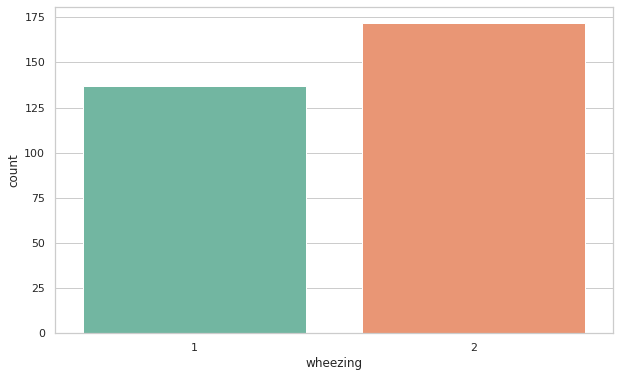

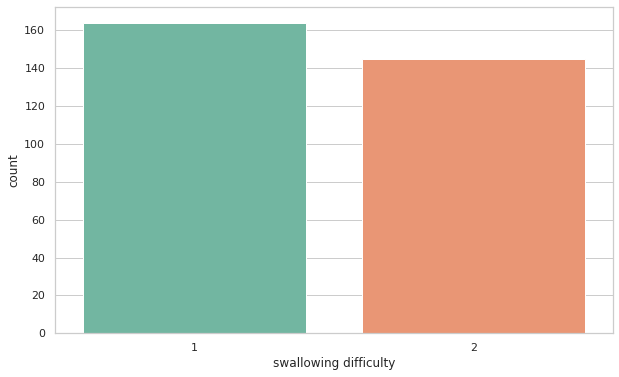

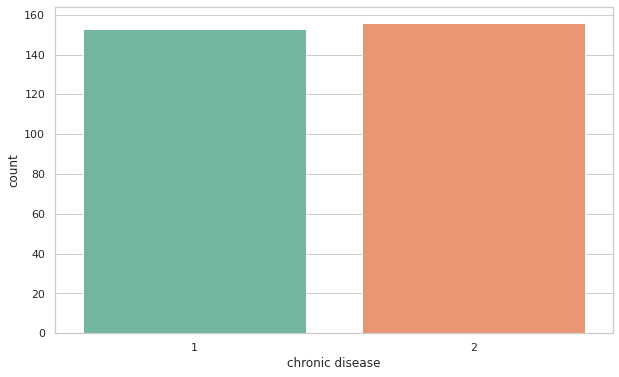

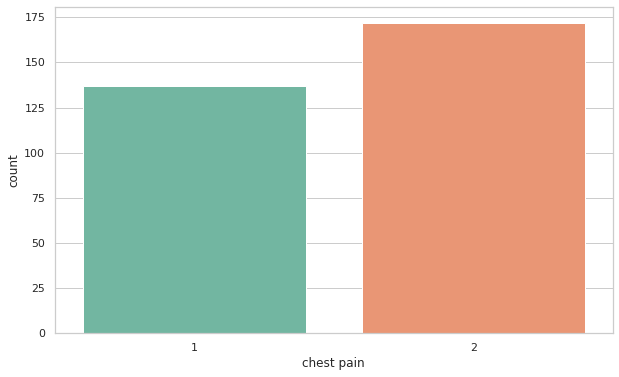

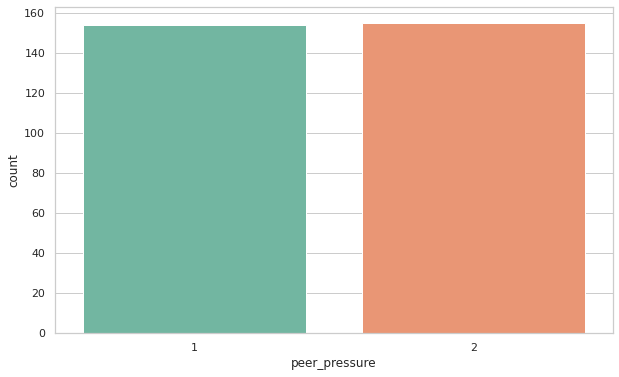

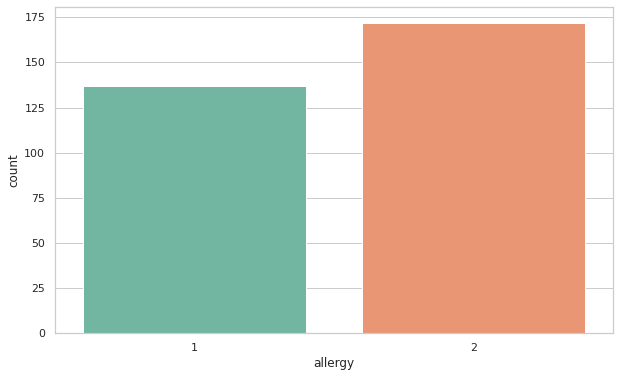

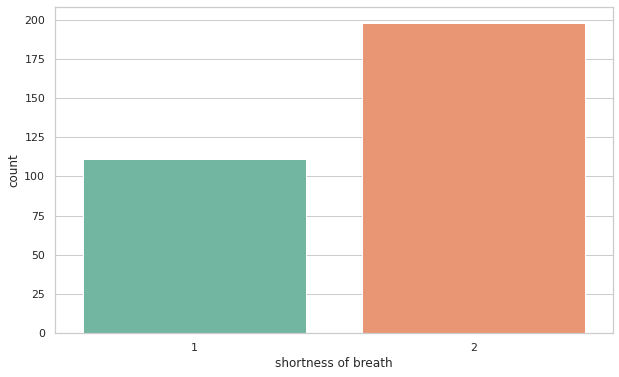

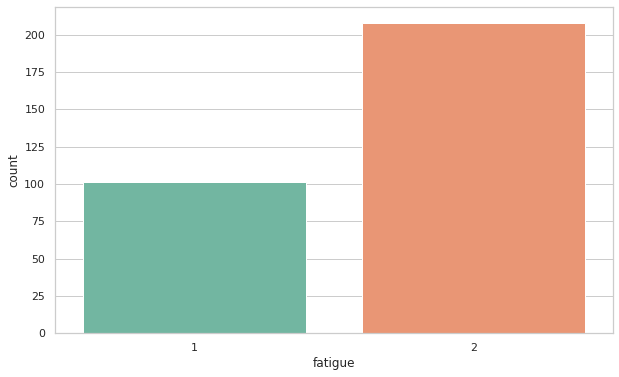

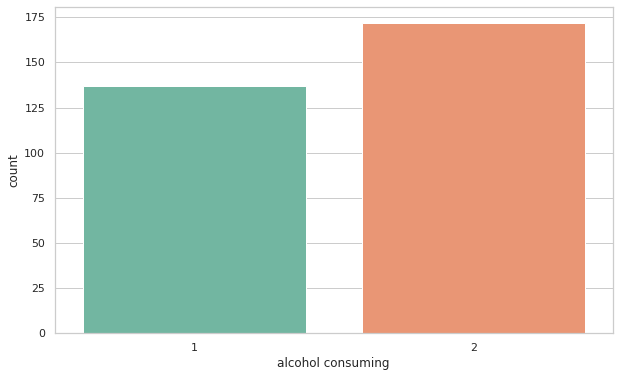

In [17]:
sns.set_theme(style="whitegrid")
for feature in bin_features:
  fig = plt.figure(figsize=(10, 6))
  sns.countplot(x=df[feature], palette='Set2')

Построим гистограмму для значений признака **gender**

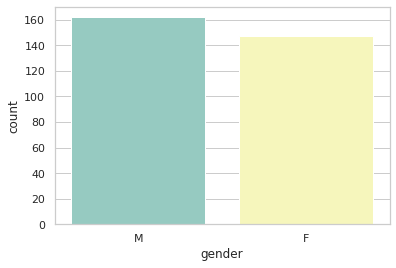

In [18]:
sns.countplot(x=df['gender'], palette='Set3')
plt.show()

Построим гистограмму для значений целевой переменной **lung_cancer**

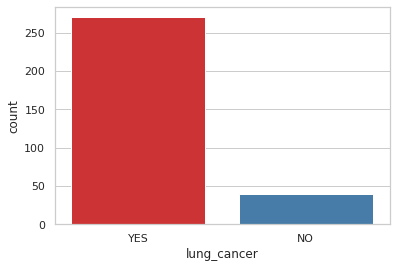

In [20]:
sns.countplot(df['lung_cancer'], palette='Set1')
plt.show()

Построим распределение значений признака **age**

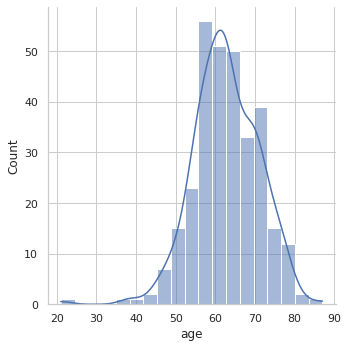

In [26]:
sns.displot(data=df, x='age', kde=True)
plt.show()

Матрица корреляций

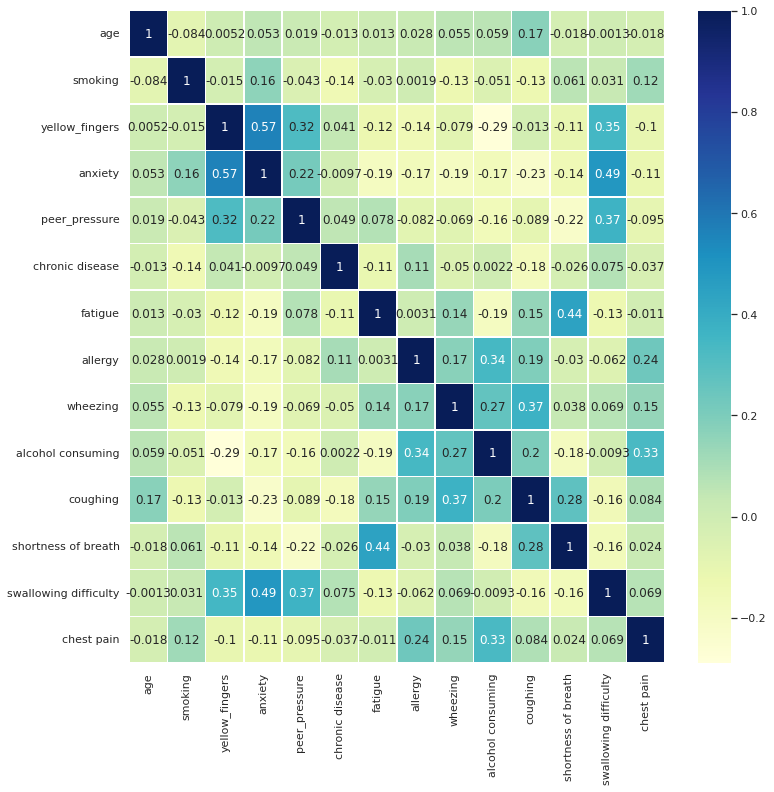

In [31]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="YlGnBu")
plt.show()

### Подготовка данных

Кодирование признака **gender**

In [35]:
df['gender'].replace({'M': 'Male', 'F':'Female'}, inplace=True)

In [40]:
df = pd.get_dummies(df, columns=['gender'])

In [42]:
df.head()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer,gender_Female,gender_Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1,0


Кодирование меток целевой переменной **lung_cancer**

In [44]:
label_encoder = LabelEncoder()
df['lung_cancer'] =  label_encoder.fit_transform(df['lung_cancer'])
df.head()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer,gender_Female,gender_Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


Стандартизация признаков

In [49]:
features = list(set(df.columns) - {'lung_cancer'})

In [50]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer,gender_Female,gender_Male
0,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,1,-0.952579,0.952579
1,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,1,-0.952579,0.952579
2,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,0,1.049781,-1.049781
3,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,0,-0.952579,0.952579
4,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,0,1.049781,-1.049781


### Построение модели

Выделение признаков и целевой переменной

In [51]:
X = df[features]
y = df['lung_cancer']

Разделение данных на тренировочную и тестовую выборки

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Логистическая регрессия

In [63]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Расчёт метрик

In [68]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.967741935483871

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

